# Data visualisation

A simple dataset for visualisation

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os


In [2]:
df = pd.read_csv('../input/books.csv',error_bad_lines=False)
df.head(2)

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.


In [3]:
df.shape #finding the number of rows and columns in the dataset

(11123, 12)

**Data Cleaning**

In [4]:
df.drop(['bookID','isbn','isbn13'],axis = 1,inplace=True) # dropping unnecessary columns
df.head(2)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.


In [5]:
df.rename(columns={'# num_pages':'total_pages'},inplace=True) #renaming columns
df.head(2)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.


**Data Visualisation**

**Let's find the number of books in all the different languages.**

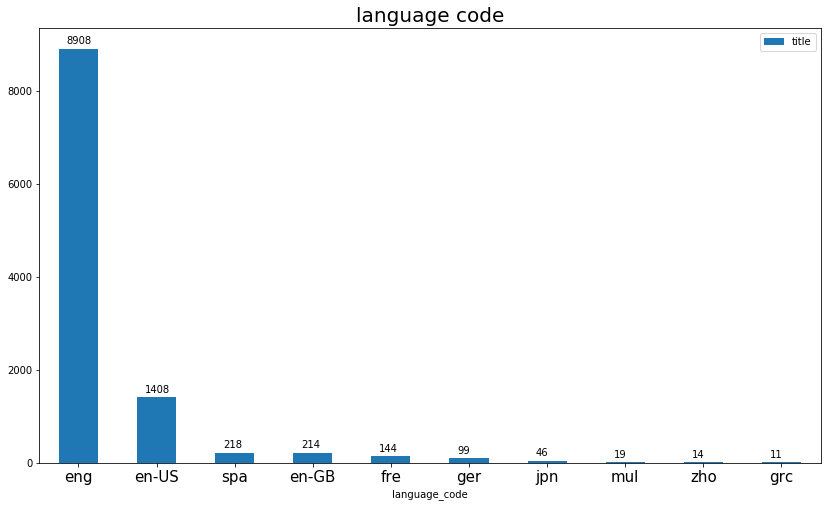

In [6]:
ax =df.groupby('language_code')['title'].count().reset_index().sort_values('title',ascending=False).head(10).set_index('language_code').plot.bar(figsize=(14,8),rot=0)
plt.title('language code',fontsize=20)
plt.xticks(fontsize=15)
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()+0.1,p.get_height()+100))

In [7]:
df = df[(df.language_code =='eng')|(df.language_code =='eng-US')|(df.language_code =='eng-GB')] # selecting only English books
df.head(2)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.


TOP 10 rated books

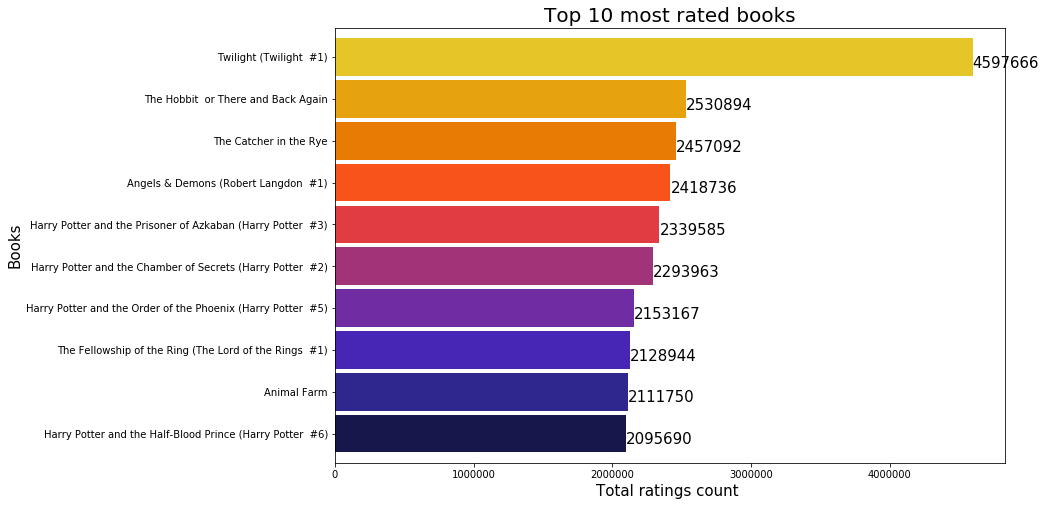

In [8]:

most_rated = df.sort_values('ratings_count',ascending=False).head(10).set_index('title')
plt.subplots(figsize=(12,8))
ax = most_rated['ratings_count'].sort_values().plot.barh(width=0.9,color=sns.color_palette('CMRmap',12))
ax.set_xlabel("Total ratings count ", fontsize=15)
ax.set_ylabel("Books", fontsize=15)
ax.set_title("Top 10 most rated books",fontsize=20,color='black')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+3, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

3 books with most reviews

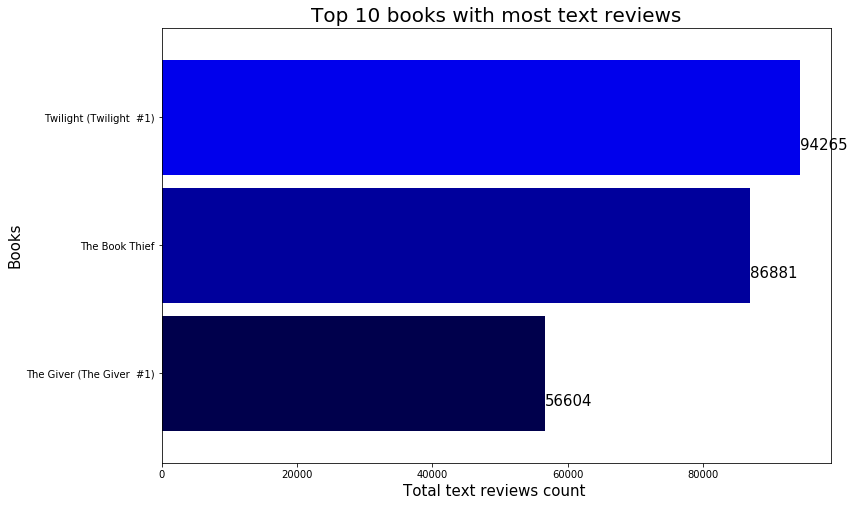

In [9]:
most_text_reviews = df.sort_values('text_reviews_count',ascending=False).head(3).set_index('title')
plt.subplots(figsize=(12,8))
ax = most_text_reviews['text_reviews_count'].sort_values().plot.barh(width=0.9,color=sns.color_palette('gnuplot2',12))
ax.set_xlabel("Total text reviews count ", fontsize=15)
ax.set_ylabel("Books", fontsize=15)
ax.set_title("Top 10 books with most text reviews",fontsize=20,color='black')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+3, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

3 books with heighest average rating

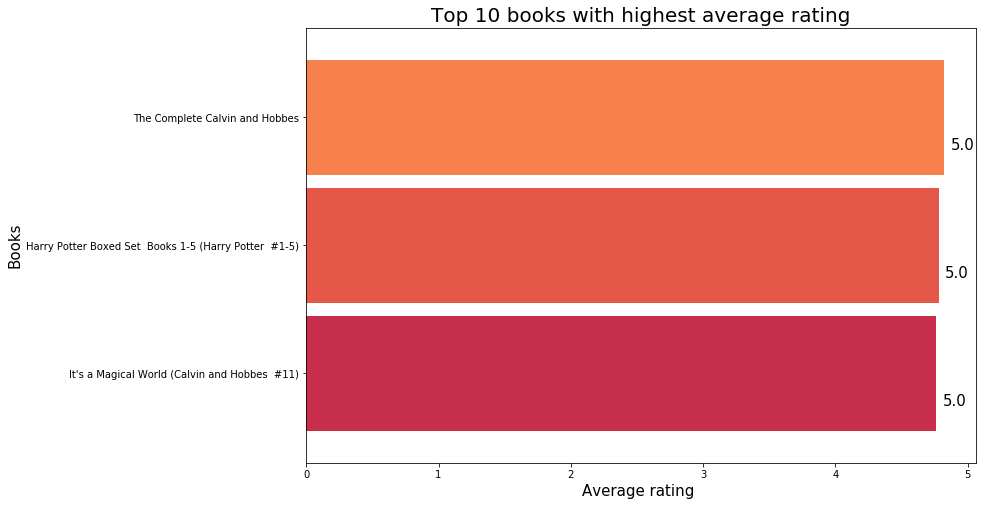

In [10]:
high_average_rating =df[df['ratings_count'] > 1000]
high_average_rating = high_average_rating.sort_values('average_rating',ascending=False).head(3).set_index('title')
plt.subplots(figsize=(12,8))
ax = high_average_rating['average_rating'].sort_values().plot.barh(width=0.9,color=sns.color_palette('Spectral',12))
ax.set_xlabel("Average rating ", fontsize=15)
ax.set_ylabel("Books", fontsize=15)
ax.set_title("Top 10 books with highest average rating",fontsize=20,color='black')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.05, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

author with maximum books

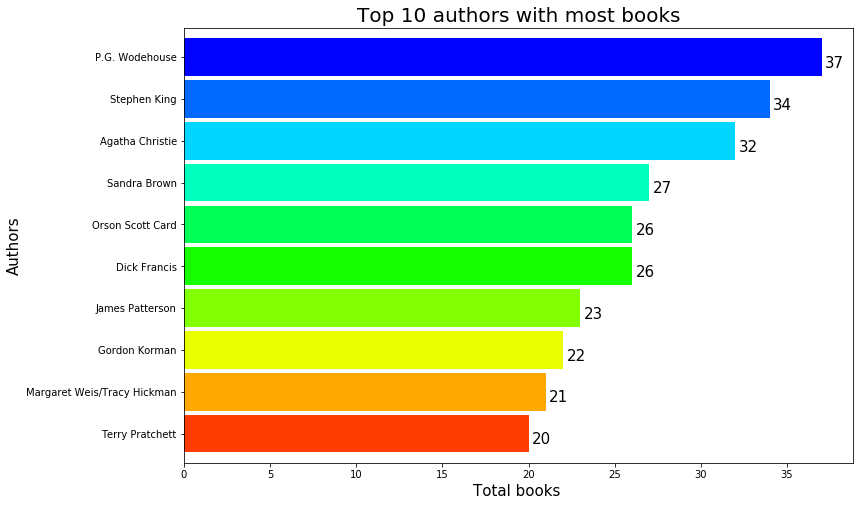

In [11]:
author_of_most_books = df.groupby('authors')['title'].count().reset_index().sort_values('title',ascending=False).head(10).set_index('authors')
plt.subplots(figsize=(12,8))
ax = author_of_most_books['title'].sort_values().plot.barh(width=0.9,color=sns.color_palette('gist_rainbow',12))
ax.set_xlabel("Total books ", fontsize=15)
ax.set_ylabel("Authors", fontsize=15)
ax.set_title("Top 10 authors with most books",fontsize=20,color='black')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

plot for average rating of all books 

Text(0.5, 0, 'Average rating')

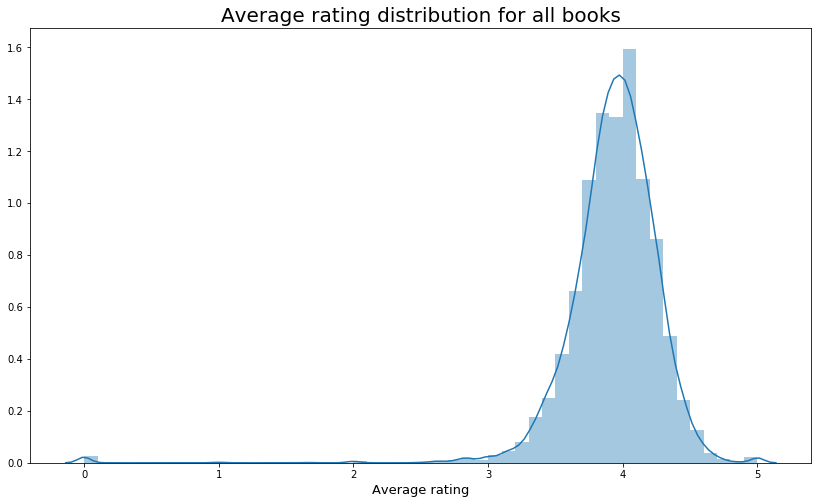

In [12]:
dist = df
dist.average_rating = dist.average_rating.astype(float)
fig, ax = plt.subplots(figsize=[14,8])
sns.distplot(dist['average_rating'],ax=ax)
ax.set_title('Average rating distribution for all books',fontsize=20)
ax.set_xlabel('Average rating',fontsize=13)